# **Import Library:** 분석에 사용할 모듈 설치

[![Open in Colab](http://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thekimk/All-About-Deep-Learning/blob/main/Practice4-3_DeepLearning_CNNArchitectures_KK.ipynb)

In [1]:
# !pip install --upgrade pip
# !python -m pip install --user --upgrade pip

In [2]:
# # Tensorflow 및 Keras 설치하기
# !pip install tensorflow
# !pip install keras
# !pip install keras-tqdm

In [3]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
tf.get_logger().warning('test')
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, concatenate, Activation, Flatten, Dropout, Reshape
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.utils import plot_model

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Evaluation metrics
from sklearn import metrics
# for regression
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error
# for classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve

2025-04-07 19:08:46.571114: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-07 19:08:46.582042: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744020526.594834   12485 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744020526.598322   12485 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-07 19:08:46.611266: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [4]:
# 사용자 정의 함수
from module_regression import *
from module_classification import *

# **Problem:** 숫자이미지 분류

## Data Preprocessing

In [5]:
# MNIST(Modified National Institute of Standards and Technology)를 Train, Test로 로딩
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [6]:
# 데이터의 갯수와 크기 확인
print('---------------train----------------')
print('X: ', X_train.shape, X_train.min(), X_train.max())
print('Y: ', Y_train.shape)
print('----------------test----------------')
print('X: ', X_test.shape, X_test.min(), X_test.max())
print('Y: ', Y_test.shape)

---------------train----------------
X:  (60000, 28, 28) 0 255
Y:  (60000,)
----------------test----------------
X:  (10000, 28, 28) 0 255
Y:  (10000,)


In [7]:
# 샘플 데이터 출력
# 0에서 255 사이의 값을 가진 데이터
for i in range(X_train[0].shape[0]):
    for j in range(X_train[0].shape[1]):
        print('{:4d}'.format(X_train[0][i][j]), end='')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

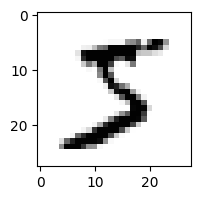

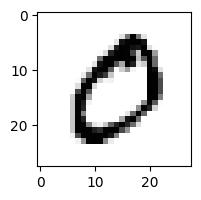

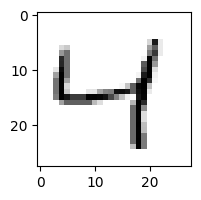

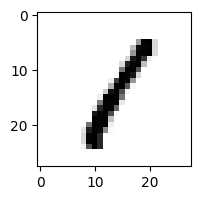

Label of train:  [5 0 4 1]


In [8]:
# 샘플 데이터 시각화
# 0에서 255 사이의 값을 가진 데이터 시각화
for i in range(4):
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[i], cmap='Greys')
    plt.show()

print('Label of train: ', Y_train[:4])

In [9]:
# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0


- **Reshape**

<center><img src='Image/Expert/MLP_Reshape3D.PNG' width='1000'></center>

In [10]:
# Reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

X_train: (60000, 784) Y_train: (60000,)
X_test: (10000, 784) Y_test: (10000,)


## MLP

<center><img src='Image/Expert/DL_MLP_Custom.PNG' width='500'></center>

In [11]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
LOSS = 'sparse_categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 5
VERBOSE = 1

I0000 00:00:1743958822.727059  837369 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1509 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

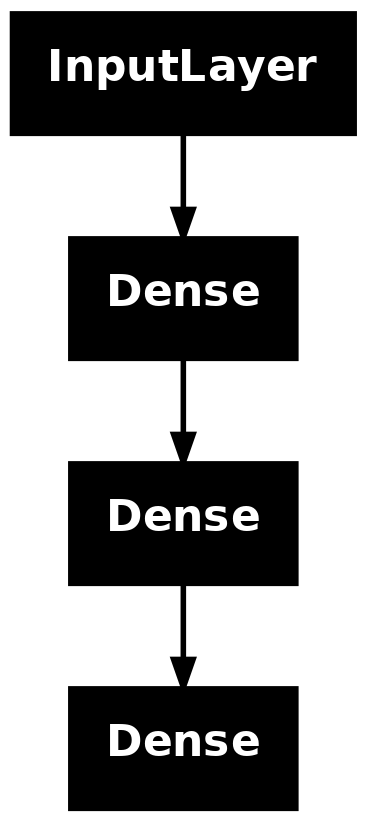

In [12]:
# 네트워크 구축
inputs = Input(shape=(X_train.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

Epoch 1/5


I0000 00:00:1743958827.253527  837502 service.cc:148] XLA service 0x7ff364006610 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743958827.253619  837502 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2025-04-07 02:00:27.270571: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743958827.344611  837502 cuda_dnn.cc:529] Loaded cuDNN version 90600
2025-04-07 02:00:28.842981: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_330', 440 bytes spill stores, 440 bytes spill loads

2025-04-07 02:00:28.905955: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_330

 59/750 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6414 - loss: 1.0467

I0000 00:00:1743958829.733337  837502 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


737/750 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8750 - loss: 0.3926

2025-04-07 02:00:32.790186: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_42', 4 bytes spill stores, 4 bytes spill loads



750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8759 - loss: 0.3900 - val_accuracy: 0.9463 - val_loss: 0.1981
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9527 - loss: 0.1608 - val_accuracy: 0.9574 - val_loss: 0.1809
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9620 - loss: 0.1292 - val_accuracy: 0.9637 - val_loss: 0.1607
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9675 - loss: 0.1170 - val_accuracy: 0.9625 - val_loss: 0.1774
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9702 - loss: 0.1118 - val_accuracy: 0.9631 - val_loss: 0.1830


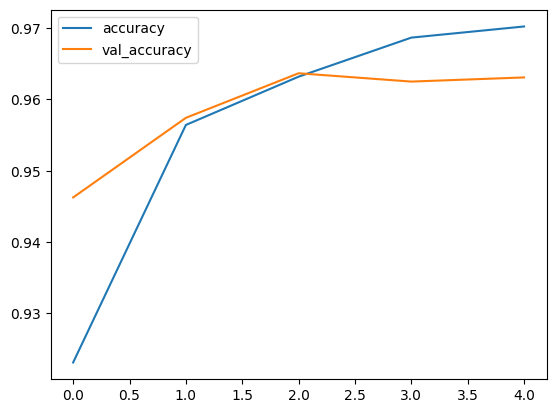

In [13]:
# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

### Prediction and Evaluation

In [14]:
# Train 데이터 예측하기
Y_trpred = model.predict(X_train)
print(Y_trpred, '\n\n', np.argmax(Y_trpred, axis=1))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
[[6.89840505e-14 5.86142523e-11 1.37447691e-19 ... 1.65464085e-15
  5.38247832e-12 3.72927297e-12]
 [1.00000000e+00 1.36928454e-24 6.43359587e-16 ... 1.41720308e-17
  1.29683691e-18 1.79507950e-10]
 [5.04966208e-12 4.23806119e-17 8.46089687e-09 ... 7.00708502e-12
  5.81187355e-11 1.00505204e-07]
 ...
 [4.44773515e-12 1.19315365e-18 3.06038280e-26 ... 2.30483476e-18
  2.97033746e-13 9.53185772e-13]
 [2.24782909e-07 9.92532967e-21 1.09042126e-12 ... 2.14797365e-17
  1.31035191e-11 3.60820987e-12]
 [2.70949444e-04 4.36583065e-07 8.53500660e-06 ... 1.21225766e-10
  9.99715745e-01 1.02571143e-08]] 

 [5 0 4 ... 5 6 8]


In [15]:
# Test 데이터 예측하기
Y_tepred = model.predict(X_test)
print(Y_tepred, '\n\n', np.argmax(Y_tepred, axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step 
[[1.59383662e-16 2.01348040e-20 1.16018740e-13 ... 1.00000000e+00
  1.03482021e-18 2.88603256e-12]
 [2.85610912e-19 2.16499422e-04 9.99783456e-01 ... 2.17171235e-14
  1.95846646e-08 1.37108198e-19]
 [3.72708165e-20 1.00000000e+00 5.60406270e-11 ... 8.77307775e-12
  3.40893043e-11 1.08388616e-19]
 ...
 [3.55398021e-19 5.24677613e-26 6.58103406e-18 ... 3.49588075e-18
  5.94443487e-15 8.05300878e-12]
 [3.79580536e-15 3.30044143e-25 3.89121779e-31 ... 1.26606653e-25
  9.39205273e-16 1.66313209e-20]
 [1.42333356e-13 5.84270251e-31 1.13354703e-21 ... 6.23860845e-30
  1.06446843e-18 8.78280341e-20]] 

 [7 2 1 ... 4 5 6]


In [16]:
# Train 예측 성능 평가하기
# 학습과정의 결과와 유사
model.evaluate(X_train, Y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9771 - loss: 0.0815


[0.10105743259191513, 0.974566638469696]

In [17]:
# Train 예측 성능 평가하기
# 학습과정의 결과와 유사
pd.crosstab(Y_train, np.argmax(model.predict(X_train), axis=1),
            rownames=['True'], colnames=['Pred'])

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,5857,3,8,1,6,3,27,7,10,1
1,1,6682,7,15,3,1,2,9,21,1
2,22,37,5780,47,1,1,4,35,29,2
3,2,4,26,5961,0,58,1,39,26,14
4,7,14,20,2,5690,1,6,5,29,68
5,17,0,6,24,4,5280,53,17,14,6
6,20,2,1,0,13,7,5867,0,8,0
7,2,15,26,13,6,3,0,6180,14,6
8,33,34,25,62,5,49,40,4,5593,6


In [18]:
# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9596 - loss: 0.1777 


[0.15900404751300812, 0.9625999927520752]

In [19]:
# Test 예측 성능 평가하기
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,965,0,3,1,1,0,3,4,3,0
1,0,1122,1,4,0,1,1,1,5,0
2,8,7,988,11,1,0,1,6,10,0
3,0,0,4,972,0,20,0,11,3,0
4,0,2,9,0,937,0,5,3,12,14
5,7,0,0,8,2,860,8,2,5,0
6,10,2,1,0,7,1,934,0,3,0
7,1,5,13,4,2,0,0,996,2,5
8,8,0,9,10,3,11,9,2,920,2


In [20]:
# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_train.shape[0])
print('목표값: ', Y_train[idx_rand])
print('예측값: ', np.argmax(model.predict(X_train[idx_rand][np.newaxis,:])))

목표값:  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
예측값:  0


### Summary

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 784) Y_train: (60000,)
X_test: (10000, 784) Y_test: (10000,)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8750 - loss: 0.3964 - val_accuracy: 0.9553 - val_loss: 0.1675
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9555 - loss: 0.1546 - val_accuracy: 0.9614 - val_loss: 0.1448
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9616 - loss: 0.1371 - val_accuracy: 0.9687 - val_loss: 0.1400
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9676 - loss: 0.1173 - val_accuracy: 0.9643 - val_loss: 0.1507
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9699 - loss: 0.1151 - val_accuracy: 0.9618 - val_loss: 0.1772


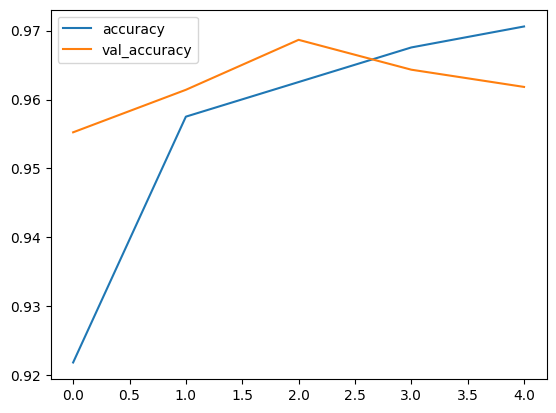

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9746 - loss: 0.0959
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9602 - loss: 0.2005 

Test Confusion Maxtrix: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step    


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,963,1,1,0,2,2,2,2,2,5
1,0,1124,6,0,0,1,2,0,1,1
2,3,4,993,4,1,0,5,8,12,2
3,0,0,4,952,0,28,0,10,6,10
4,0,1,0,0,940,0,10,3,2,26
5,2,0,0,3,0,867,6,4,5,5
6,2,3,0,0,2,15,932,1,2,1
7,0,7,5,3,3,1,0,1001,0,8
8,3,2,3,7,6,20,11,2,909,11


In [21]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
LOSS = 'sparse_categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 5
VERBOSE = 1

# Train, Test로 로딩
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

## CNN

<center><img src='Image/Expert/CNN_Example.webp' width='900'></center>

### Convolution and Pooling

<center><img src='Image/Expert/CNN_Process_BlackImage.png' width='800'>(https://all-young.tistory.com/43)</center>

- **Convolution**

In [22]:
# 임의 데이터 생성
X = tf.random.normal(shape=(128,28,28,1), mean=0., stddev=1.) # [batch size, W, H, channel]
X.shape

TensorShape([128, 28, 28, 1])

In [23]:
# 합성곱을 통과한 데이터
hiddens = Conv2D(filters=32, kernel_size=(3,3), activation="relu")(X)
print('After Convolution: ', hiddens.shape)

After Convolution:  (128, 26, 26, 32)


In [24]:
# STRIDE 이동을 빠르게 할 경우의 데이터
hiddens = Conv2D(filters=32, kernel_size=(3,3), strides=2, activation="relu")(X)
print('After Convolution: ', hiddens.shape)

After Convolution:  (128, 13, 13, 32)


In [25]:
# 입력과 출력의 크기가 같은 데이터
hiddens = Conv2D(filters=32, kernel_size=(3,3), strides=2, padding='same', activation="relu")(X)
print('After Convolution: ', hiddens.shape)

After Convolution:  (128, 14, 14, 32)


- **Pooling**

In [26]:
# 임의 데이터 생성
X = tf.random.normal(shape=(128,28,28,1), mean=0., stddev=1.) # [batch size, W, H, channel]
hiddens = Conv2D(filters=32, kernel_size=(3,3), strides=2, padding='same', activation="relu")(X)
print('After Convolution: ', hiddens.shape)

After Convolution:  (128, 14, 14, 32)


In [27]:
# Max Pooling 이후의 데이터
hiddens_pool = MaxPooling2D(pool_size=(2,2), strides=(2,2))(hiddens)
print('After Pooling: ', hiddens_pool.shape)

After Pooling:  (128, 7, 7, 32)


In [28]:
# Max Pooling 이후의 데이터
hiddens_pool = MaxPooling2D(pool_size=(4,4), strides=(4,4))(hiddens)
print('After Pooling: ', hiddens_pool.shape)

After Pooling:  (128, 3, 3, 32)


In [29]:
# Max Pooling 이후의 데이터
hiddens_pool = MaxPooling2D(pool_size=(4,4), strides=(4,4), padding='same')(hiddens)
print('After Pooling: ', hiddens_pool.shape)

After Pooling:  (128, 4, 4, 32)


- **Reshape**

<center><img src='Image/Expert/CNN_Reshape3D.PNG' width='1000'></center>

### Summary

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 28, 28, 1) Y_train: (60000,)
X_test: (10000, 28, 28, 1) Y_test: (10000,)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │       250,890 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,170 (985.04 KB)

 Trainable params: 252,170 (985.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9177 - loss: 0.2627 - val_accuracy: 0.9754 - val_loss: 0.0893
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9788 - loss: 0.0708 - val_accuracy: 0.9778 - val_loss: 0.0928
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9846 - loss: 0.0495 - val_accuracy: 0.9756 - val_loss: 0.1041
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9882 - loss: 0.0374 - val_accuracy: 0.9778 - val_loss: 0.1136
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9906 - loss: 0.0290 - val_accuracy: 0.9746 - val_loss: 0.1249


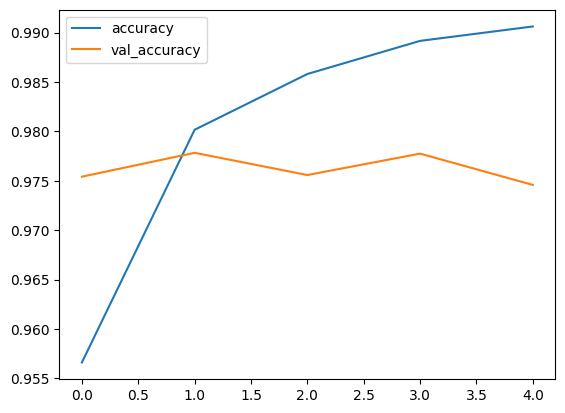

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9899 - loss: 0.0313
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9713 - loss: 0.1295 

Test Confusion Maxtrix: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,961,1,0,1,0,0,15,0,1,1
1,0,1130,1,2,0,0,1,1,0,0
2,3,4,1000,3,3,0,7,9,2,1
3,0,1,2,985,0,13,1,2,4,2
4,1,0,1,0,960,0,7,1,0,12
5,3,2,0,10,0,858,11,0,4,4
6,2,2,0,1,1,2,950,0,0,0
7,0,3,9,3,2,0,0,1002,4,5
8,3,1,2,1,5,1,18,3,936,4


In [30]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
LOSS = 'sparse_categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 5
VERBOSE = 1

# Train, Test로 로딩
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(-1, X_test.shape[1], X_train.shape[2], 1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
hiddens = Conv2D(128, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(inputs)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Flatten()(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

## CNN with Tuning

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 28, 28, 1) Y_train: (60000,)
X_test: (10000, 28, 28, 1) Y_test: (10000,)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │       100,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,786 (686.66 KB)

 Trainable params: 175,786 (686.66 KB)

 Non-trainable params: 0 (0.00 B)

Training Progress:   0%|                                                                          | 0/5 [00:00<?, ?it/s]

Epoch 1/5
746/750 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7567 - loss: 0.7133

Training Progress:  20%|█████████████▏                                                    | 1/5 [00:07<00:30,  7.67s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7575 - loss: 0.7113 - val_accuracy: 0.9699 - val_loss: 0.1033
Epoch 2/5
744/750 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9224 - loss: 0.2524

Training Progress:  40%|██████████████████████████▍                                       | 2/5 [00:11<00:16,  5.34s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9225 - loss: 0.2523 - val_accuracy: 0.9767 - val_loss: 0.0849
Epoch 3/5
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9320 - loss: 0.2227

Training Progress:  60%|███████████████████████████████████████▌                          | 3/5 [00:15<00:09,  4.61s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9320 - loss: 0.2227 - val_accuracy: 0.9714 - val_loss: 0.0999
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9320 - loss: 0.2278

Training Progress:  80%|████████████████████████████████████████████████████▊             | 4/5 [00:18<00:04,  4.21s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9320 - loss: 0.2278 - val_accuracy: 0.9803 - val_loss: 0.0724
Epoch 5/5
742/750 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9361 - loss: 0.2105

Training Progress: 100%|██████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  3.99s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9361 - loss: 0.2104 - val_accuracy: 0.9793 - val_loss: 0.0674


Training Progress: 100%|██████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.48s/it]


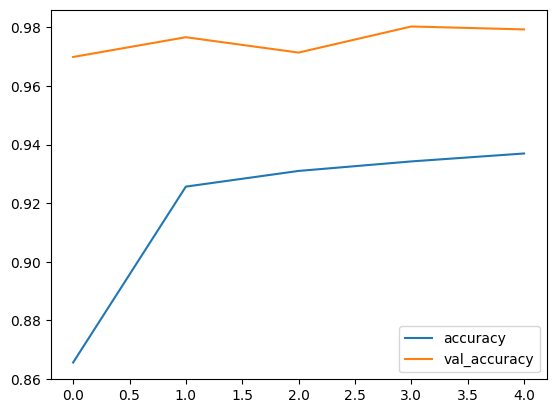

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9808 - loss: 0.0599
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9783 - loss: 0.0717 

Test Confusion Maxtrix: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step    


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,966,0,2,0,0,0,8,1,3,0
1,0,1129,2,2,0,0,0,1,1,0
2,1,3,1006,3,0,0,0,16,3,0
3,0,0,4,990,0,5,0,7,3,1
4,0,0,0,0,959,0,3,4,1,15
5,2,1,0,4,1,880,3,1,0,0
6,3,2,0,0,4,2,946,0,1,0
7,0,4,3,1,0,1,0,1017,1,1
8,0,2,4,1,4,2,2,3,948,8


In [31]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'sparse_categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 5
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
class TQDMProgressBar(callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.epochs_pbar = tqdm(total=self.params['epochs'], desc='Training Progress', position=0, leave=True)

    def on_epoch_end(self, epoch, logs=None):
        self.epochs_pbar.update(1)

    def on_train_end(self, logs=None):
        self.epochs_pbar.close()
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','Number_MNIST_CNN.keras')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', patience=EARLYSTOP_PATIENT, verbose=1), 
            TQDMProgressBar(),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(-1, X_test.shape[1], X_train.shape[2], 1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
hiddens = Conv2D(128, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(inputs)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Conv2D(64, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(hiddens)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Flatten()(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION)(hiddens)  
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

In [32]:
# 베스트 모델 로딩
model = load_model(FILENAME)

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9808 - loss: 0.0599
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9783 - loss: 0.0717

Test Confusion Maxtrix: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,966,0,2,0,0,0,8,1,3,0
1,0,1129,2,2,0,0,0,1,1,0
2,1,3,1006,3,0,0,0,16,3,0
3,0,0,4,990,0,5,0,7,3,1
4,0,0,0,0,959,0,3,4,1,15
5,2,1,0,4,1,880,3,1,0,0
6,3,2,0,0,4,2,946,0,1,0
7,0,4,3,1,0,1,0,1017,1,1
8,0,2,4,1,4,2,2,3,948,8


목표값: 


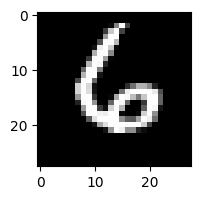

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
예측값:  6


In [33]:
# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
print('예측값: ', np.argmax(model.predict(X_test[idx_rand][np.newaxis,:])))

# **Problem:** 패션이미지 분류

## Data Preprocessing

In [34]:
# Train, Test 로딩
mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step 
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [35]:
# 데이터의 갯수와 크기 확인
print('---------------train----------------')
print('X: ', X_train.shape, X_train.min(), X_train.max())
print('Y: ', Y_train.shape)
print('----------------test----------------')
print('X: ', X_test.shape, X_test.min(), X_test.max())
print('Y: ', Y_test.shape)

---------------train----------------
X:  (60000, 28, 28) 0 255
Y:  (60000,)
----------------test----------------
X:  (10000, 28, 28) 0 255
Y:  (10000,)


In [36]:
# 샘플 데이터 출력
# 0에서 255 사이의 값을 가진 데이터
for i in range(X_train[0].shape[0]):
    for j in range(X_train[0].shape[1]):
        print('{:4d}'.format(X_train[0][i][j]), end='')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0
   0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3
   0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15
   0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66
   0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 223 215 213 164 127

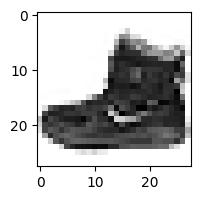

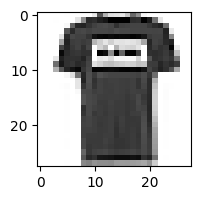

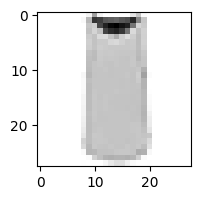

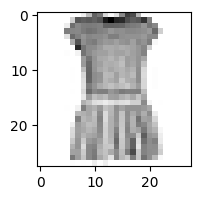

Label of train:  ['Ankle Boot', 'T-shirt', 'T-shirt', 'Dress']


In [37]:
# 샘플 데이터 시각화
# 0에서 255 사이의 값을 가진 데이터 시각화
for i in range(4):
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[i], cmap='Greys')
    plt.show()

Y_label_list = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
print('Label of train: ', [Y_label_list[num] for num in Y_train[:4]])

## `categorical_crossentropy?`

> **"일반적으로 다중 클래스/라벨 분류시, `categorical_crossentropy` 또는 `sparse_categorical_crossentropy`를 사용할 수 있음"**
>
> - 숫자이미지 데이터의 Y값은 `0에서 9사이의 값이 출력될 1자리의 숫자`
>
> ```python
---------------train----------------
X:  (60000, 28, 28) 0 255
Y:  (60000,)
----------------test----------------
X:  (10000, 28, 28) 0 255
Y:  (10000,)
>```
>
> - 모델링의 출력형태는 `0에서 9사이의 값이 출력될 각각의 확률 10자리의 숫자`
>
>```python
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens) 
```


In [38]:
# sparse_categorical_crossentropy 사용시 입출력
# Y값은 0에서 2사이의 값이 출력될 1자리의 숫자
Y_true = [1, 2]
# 출력 Y는 0에서 2사이의 값이 출력될 각각의 확률 3자리의 숫자
Y_pred = [[0, 0.9, 0.1], [0.6, 0.8, 0.1]]
loss = keras.metrics.sparse_categorical_crossentropy(Y_true, Y_pred)
loss

AttributeError: 'list' object has no attribute 'shape'

- **Case 1:** 입력이 평가함수의 입력형태와 맞지 않을 경우

```python
# sparse_categorical_crossentropy 사용시 입출력
# Y값은 0에서 2사이의 값이 출력될 1자리의 숫자
Y_true = [1, 2]
# 출력 Y는 0에서 2사이의 값이 출력될 각각의 확률 3자리의 숫자
Y_pred = [[0, 0.9, 0.1], [0.6, 0.8, 0.1]]
loss = keras.metrics.sparse_categorical_crossentropy(Y_true, Y_pred)
loss

## 출력 메시지
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Cell In[38], line 6
      4 # 출력 Y는 0에서 2사이의 값이 출력될 각각의 확률 3자리의 숫자
      5 Y_pred = [[0, 0.9, 0.1], [0.6, 0.8, 0.1]]
----> 6 loss = keras.metrics.sparse_categorical_crossentropy(Y_true, Y_pred)
      7 loss

File ~/.conda/envs/py312_cuda126dnn960/lib/python3.12/site-packages/keras/src/losses/losses.py:2230, in sparse_categorical_crossentropy(y_true, y_pred, from_logits, ignore_class, axis)
   2193 @keras_export(
   2194     [
   2195         "keras.metrics.sparse_categorical_crossentropy",
   (...)
   2200     y_true, y_pred, from_logits=False, ignore_class=None, axis=-1
   2201 ):
   2202     """Computes the sparse categorical crossentropy loss.
   2203 
   2204     Args:
   (...)
   2227     array([0.0513, 2.303], dtype=float32)
   2228     """
-> 2230     if len(y_true.shape) == len(y_pred.shape) and y_true.shape[-1] == 1:
   2231         y_true = ops.squeeze(y_true, axis=-1)
   2233     if ignore_class is not None:

AttributeError: 'list' object has

- **Case 2:** 입력이 평가함수의 입력형태와 맞지 않을 경우
  
```python
# Y값은 0에서 2사이의 값이 출력될 각각의 확률 3자리의 숫자로(One-hot Encoding 방식)으로 받을 시 출력
Y_true = [[0,1,0], [0,0,1]]
# 출력 Y는 0에서 2사이의 값이 출력될 각각의 확률 3자리의 숫자
Y_pred = [[0, 0.9, 0.1], [0.6, 0.8, 0.1]]
loss = keras.metrics.sparse_categorical_crossentropy(Y_true, Y_pred)
loss

# 출력 메시지
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Cell In[38], line 6
      4 # 출력 Y는 0에서 2사이의 값이 출력될 각각의 확률 3자리의 숫자
      5 Y_pred = [[0, 0.9, 0.1], [0.6, 0.8, 0.1]]
----> 6 loss = keras.metrics.sparse_categorical_crossentropy(Y_true, Y_pred)
      7 loss

File ~/.conda/envs/py312_cuda126dnn960/lib/python3.12/site-packages/keras/src/losses/losses.py:2230, in sparse_categorical_crossentropy(y_true, y_pred, from_logits, ignore_class, axis)
   2193 @keras_export(
   2194     [
   2195         "keras.metrics.sparse_categorical_crossentropy",
   (...)
   2200     y_true, y_pred, from_logits=False, ignore_class=None, axis=-1
   2201 ):
   2202     """Computes the sparse categorical crossentropy loss.
   2203 
   2204     Args:
   (...)
   2227     array([0.0513, 2.303], dtype=float32)
   2228     """
-> 2230     if len(y_true.shape) == len(y_pred.shape) and y_true.shape[-1] == 1:
   2231         y_true = ops.squeeze(y_true, axis=-1)
   2233     if ignore_class is not None:

AttributeError: 'list' object has no attribute 'shape'
``` no attribute 'shape'
```

In [39]:
# Y값은 0에서 2사이의 값이 출력될 각각의 확률 3자리의 숫자로(One-hot Encoding 방식)으로 받을 시 출력
Y_true = [[0,1,0], [0,0,1]]
# 출력 Y는 0에서 2사이의 값이 출력될 각각의 확률 3자리의 숫자
Y_pred = [[0, 0.9, 0.1], [0.6, 0.8, 0.1]]
loss = keras.metrics.categorical_crossentropy(Y_true, Y_pred)
loss

I0000 00:00:1744020339.749200    1549 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5520 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.10536055, 2.7080503 ], dtype=float32)>

> | **다중분류 비용함수 종류** | **Y 입력형태** | **Y 출력형태** | **결론** |
|:---:|:---|:---|:---|
| `sparse_categorical_crossentropy` | `[1, 2]` | `[[0, 0.9, 0.1], [0.6, 0.8, 0.1]]` | 입력이 `정수형태`일 때 사용 |
| `categorical_crossentropy` | `[[0,1,0], [0,0,1]]` | `[[0, 0.9, 0.1], [0.6, 0.8, 0.1]]` | 입력이 `One-hot 벡터형태`일 때 사용 |
>
> - 어떤 비용함수를 사용하든 `정확성 성능은 동일`하지만, `sparse_categorical_crossentropy`를 사용하면 One-hot Encoding을 사용하지 않기 때문에 `메모리를 적게 사용하는 이점`

## `One-hot Encoding?`

**1) Binning(구간화):** `연속형 변수를 범주형` 변수로 변환

- 숫자로 구성된 `연속형 값이 넓을 경우` 그룹을 지어 이해도를 높임
- 변수의 선형적 특성 이외에 `비선형적 특성을 반영`

**2) Label Encoding:** `범주형 변수`의 값들을 `숫자 값(레이블)`로 변경

<center><img src='Image/Expert/Label_Encoding.png' width='250'></center>

**3) Dummy Variable(가변수, $D_i$)**: `범주형 변수`를 `0 또는 1값`을 가진 `하나 이상의 새로운 변수`로 변경(One-hot Encoding)

- **생성법:** `계절변수`가 봄/여름/가을/겨울 이라는 값을 포함하는 경우, `계절_봄`, `계절_여름`, `계절_가을`, `계절_겨울` 총 4개의 변수를 생성

> (1) 범주형 변수의 `독립 값을 확인` (봄/여름/가을/겨울)
>
> (2) 독립 값의 `갯수만큼 더미변수`를 생성 ($D_1$ = 봄, $D_2$ = 여름, $D_3$ = 가을, $D_3$ = 겨울) 
>> *더미변수의 갯수는 최대 1개까지 줄일 수 있음*
>
> (3) 각 `더미변수들의 값`은 변수의 정의와 `같으면 1`이고 `나머지는 0`으로 채움   

<center><img src='Image/Expert/Dummy_Engineering.png' width='500'></center>

<!-- <center><img src='Image/Advanced/Dummy-variable-regression.jpg' width='400'></center> -->

## MLP

<center><img src='Image/Expert/DL_MLP_Custom.PNG' width='500'></center>

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 784) Y_train: (60000, 10)
X_test: (10000, 784) Y_test: (10000, 10)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7417 - loss: 0.7785 - val_accuracy: 0.8425 - val_loss: 0.4427
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8455 - loss: 0.4244 - val_accuracy: 0.8523 - val_loss: 0.4194
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8575 - loss: 0.3915 - val_accuracy: 0.8586 - val_loss: 0.4098
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8636 - loss: 0.3729 - val_accuracy: 0.8626 - val_loss: 0.4267
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8685 - loss: 0.3675 - val_accuracy: 0.8593 - val_loss: 0.4182
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8687 - loss: 0.3599 - val_accuracy: 0.8595 - val_loss: 0.4132
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8739 - loss: 0.3491 - val_accuracy: 0.8631 - val_loss: 0.3983
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8783 - loss: 0.3379 - val_accuracy: 0.

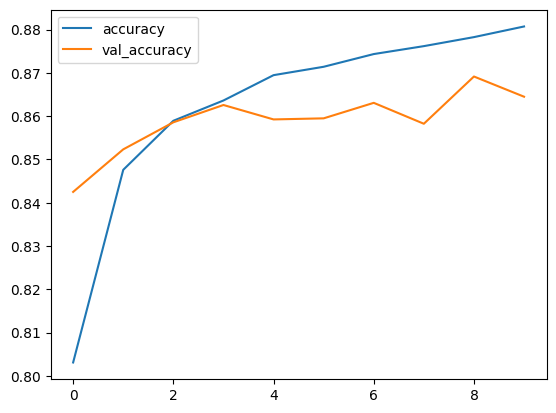

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8860 - loss: 0.3138
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8616 - loss: 0.4193

Test Confusion Maxtrix: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step    


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,855,0,7,18,2,3,104,1,10,0
1,9,952,3,30,3,0,2,0,1,0
2,18,0,671,10,163,0,133,0,5,0
3,75,3,3,857,22,2,35,0,3,0
4,2,0,56,38,784,0,110,0,10,0
5,0,0,0,0,0,954,0,26,1,19
6,186,0,49,20,59,0,667,0,19,0
7,0,0,0,0,0,27,0,942,0,31
8,3,0,1,3,1,2,19,5,966,0


In [40]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 10
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
class TQDMProgressBar(callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.epochs_pbar = tqdm(total=self.params['epochs'], desc='Training Progress', position=0, leave=True)

    def on_epoch_end(self, epoch, logs=None):
        self.epochs_pbar.update(1)

    def on_train_end(self, logs=None):
        self.epochs_pbar.close()
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','Fashion_MNIST_MLP.keras')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', patience=EARLYSTOP_PATIENT, verbose=1), 
            TQDMProgressBar(),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

## CNN

<center><img src='Image/Expert/CNN_Example.webp' width='900'></center>

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 28, 28, 1) Y_train: (60000, 10)
X_test: (10000, 28, 28, 1) Y_test: (10000, 10)


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │       100,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,786 (686.66 KB)

 Trainable params: 175,786 (686.66 KB)

 Non-trainable params: 0 (0.00 B)

Training Progress:   0%|                                                                         | 0/10 [00:00<?, ?it/s]

Epoch 1/10
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6388 - loss: 0.9667  

Training Progress:  10%|██████▌                                                          | 1/10 [00:06<01:02,  6.94s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6390 - loss: 0.9661 - val_accuracy: 0.8406 - val_loss: 0.4607
Epoch 2/10
743/750 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7829 - loss: 0.5871

Training Progress:  20%|█████████████                                                    | 2/10 [00:10<00:39,  4.90s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7829 - loss: 0.5870 - val_accuracy: 0.8510 - val_loss: 0.4390
Epoch 3/10
746/750 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7902 - loss: 0.5570

Training Progress:  30%|███████████████████▌                                             | 3/10 [00:13<00:29,  4.25s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7902 - loss: 0.5570 - val_accuracy: 0.8582 - val_loss: 0.3960
Epoch 4/10
740/750 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8002 - loss: 0.5368

Training Progress:  40%|██████████████████████████                                       | 4/10 [00:17<00:23,  3.98s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8002 - loss: 0.5367 - val_accuracy: 0.8621 - val_loss: 0.3779
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8026 - loss: 0.5270

Training Progress:  50%|████████████████████████████████▌                                | 5/10 [00:21<00:19,  3.90s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8026 - loss: 0.5270 - val_accuracy: 0.8655 - val_loss: 0.3758
Epoch 6/10
738/750 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8072 - loss: 0.5187

Training Progress:  60%|███████████████████████████████████████                          | 6/10 [00:24<00:15,  3.80s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8072 - loss: 0.5187 - val_accuracy: 0.8677 - val_loss: 0.3743
Epoch 7/10
743/750 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8114 - loss: 0.5105

Training Progress:  70%|█████████████████████████████████████████████▌                   | 7/10 [00:28<00:11,  3.74s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8114 - loss: 0.5105 - val_accuracy: 0.8677 - val_loss: 0.3605
Epoch 8/10
747/750 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8157 - loss: 0.4989

Training Progress:  80%|████████████████████████████████████████████████████             | 8/10 [00:32<00:07,  3.79s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8157 - loss: 0.4990 - val_accuracy: 0.8755 - val_loss: 0.3489
Epoch 9/10
744/750 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8117 - loss: 0.5046

Training Progress:  90%|██████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.74s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8117 - loss: 0.5046 - val_accuracy: 0.8715 - val_loss: 0.3613
Epoch 10/10
738/750 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8160 - loss: 0.4961

Training Progress: 100%|████████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.65s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8160 - loss: 0.4961 - val_accuracy: 0.8663 - val_loss: 0.3624


Training Progress: 100%|████████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.94s/it]


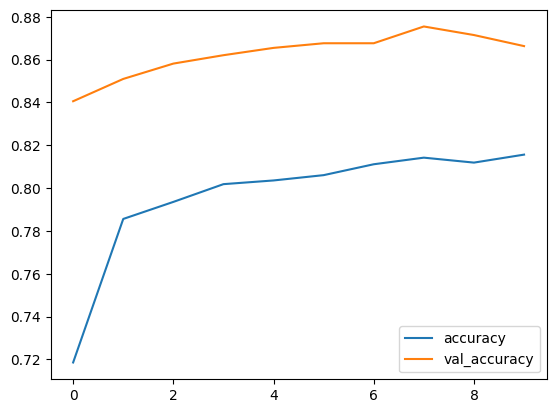

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8742 - loss: 0.3413
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8625 - loss: 0.3854 

Test Confusion Maxtrix: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,865,0,10,39,2,1,79,0,4,0
1,2,963,2,29,1,0,1,0,2,0
2,18,1,800,9,88,0,84,0,0,0
3,31,4,10,903,15,0,37,0,0,0
4,0,1,145,53,709,0,92,0,0,0
5,0,0,0,1,0,957,0,33,1,8
6,253,1,105,33,76,0,522,0,9,1
7,0,0,0,0,0,7,0,960,1,32
8,3,0,4,3,2,1,13,2,971,1


In [41]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 10
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
class TQDMProgressBar(callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.epochs_pbar = tqdm(total=self.params['epochs'], desc='Training Progress', position=0, leave=True)

    def on_epoch_end(self, epoch, logs=None):
        self.epochs_pbar.update(1)

    def on_train_end(self, logs=None):
        self.epochs_pbar.close()
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','Fashion_MNIST_CNN.keras')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', patience=EARLYSTOP_PATIENT, verbose=1), 
            TQDMProgressBar(),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(-1, X_test.shape[1], X_train.shape[2], 1)
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
hiddens = Conv2D(128, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(inputs)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Conv2D(64, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(hiddens)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Flatten()(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION)(hiddens)  
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

목표값: 


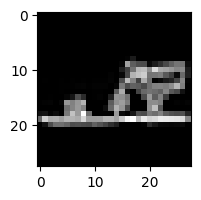

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
예측값:  Sandal


In [42]:
# 베스트 모델 로딩
model = load_model(FILENAME)

# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
Y_label_list = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
print('예측값: ', Y_label_list[np.argmax(model.predict(X_test[idx_rand][np.newaxis,:]))])

## ResNet50

<center><img src='Image/Expert/CNN_ResNet.png' width='1000'>(Deep Residual Learning for Image Recognition)</center>

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 28, 28, 1) Y_train: (60000, 10)
X_test: (10000, 28, 28, 1) Y_test: (10000, 10)


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 34, 34, 1) │          0 │ input_layer_6[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 14, 14,    │      3,200 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 14, 14,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 14, 14,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 16, 16,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 7, 7, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 7, 7, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 7, 7, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 7, 7, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 7, 7, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 7, 7, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 7, 7, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 7, 7, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 7, 7, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 7, 7, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 7, 7, 256) │      1,024 │ conv2_block1_3_c

 Total params: 23,601,930 (90.03 MB)

 Trainable params: 23,548,810 (89.83 MB)

 Non-trainable params: 53,120 (207.50 KB)

Training Progress:   0%|                                                                         | 0/10 [00:00<?, ?it/s]

Epoch 1/10


2025-04-07 02:07:21.514957: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14140', 4 bytes spill stores, 4 bytes spill loads

2025-04-07 02:07:21.721639: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_9672', 92 bytes spill stores, 92 bytes spill loads

2025-04-07 02:07:21.838309: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_9672', 384 bytes spill stores, 384 bytes spill loads



748/750 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4909 - loss: 2.0159 

2025-04-07 02:07:54.500679: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1708', 92 bytes spill stores, 92 bytes spill loads

2025-04-07 02:07:54.511121: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1708', 384 bytes spill stores, 384 bytes spill loads

Training Progress:  10%|██████▌                                                          | 1/10 [01:02<09:20, 62.31s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.4912 - loss: 2.0133 - val_accuracy: 0.5566 - val_loss: 1.0763
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7188 - loss: 0.8310 

Training Progress:  20%|█████████████                                                    | 2/10 [01:22<05:01, 37.73s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.7188 - loss: 0.8309 - val_accuracy: 0.7744 - val_loss: 0.5862
Epoch 3/10
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8053 - loss: 0.5365 

Training Progress:  30%|███████████████████▌                                             | 3/10 [01:43<03:29, 29.92s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.8054 - loss: 0.5365 - val_accuracy: 0.8478 - val_loss: 0.4233
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8447 - loss: 0.4303 

Training Progress:  40%|██████████████████████████                                       | 4/10 [02:03<02:36, 26.08s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.8447 - loss: 0.4303 - val_accuracy: 0.8580 - val_loss: 0.3913
Epoch 5/10
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8646 - loss: 0.3763 

Training Progress:  50%|████████████████████████████████▌                                | 5/10 [02:25<02:02, 24.59s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.8646 - loss: 0.3763 - val_accuracy: 0.8645 - val_loss: 0.3736
Epoch 6/10
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8742 - loss: 0.3470 

Training Progress:  60%|███████████████████████████████████████                          | 6/10 [02:47<01:35, 23.75s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.8742 - loss: 0.3470 - val_accuracy: 0.8743 - val_loss: 0.3560
Epoch 7/10
748/750 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8848 - loss: 0.3198 

Training Progress:  70%|█████████████████████████████████████████████▌                   | 7/10 [03:08<01:07, 22.62s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.8848 - loss: 0.3197 - val_accuracy: 0.8758 - val_loss: 0.3618
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8911 - loss: 0.3010 

Training Progress:  80%|████████████████████████████████████████████████████             | 8/10 [03:26<00:42, 21.22s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.8911 - loss: 0.3010 - val_accuracy: 0.8840 - val_loss: 0.3381
Epoch 9/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8954 - loss: 0.2909 

Training Progress:  90%|██████████████████████████████████████████████████████████▌      | 9/10 [03:48<00:21, 21.43s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.8954 - loss: 0.2909 - val_accuracy: 0.8899 - val_loss: 0.3184
Epoch 10/10
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9003 - loss: 0.2787 

Training Progress: 100%|████████████████████████████████████████████████████████████████| 10/10 [04:10<00:00, 21.78s/it]

750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9003 - loss: 0.2787 - val_accuracy: 0.8826 - val_loss: 0.3460


Training Progress: 100%|████████████████████████████████████████████████████████████████| 10/10 [04:10<00:00, 25.07s/it]


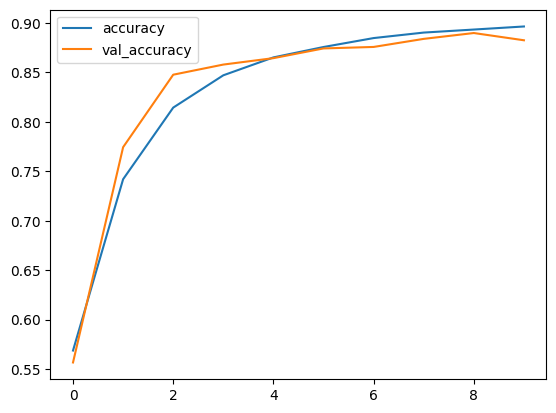

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8899 - loss: 0.2924
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8772 - loss: 0.3580

2025-04-07 02:11:22.219213: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1708', 92 bytes spill stores, 92 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8771 - loss: 0.3582

Test Confusion Maxtrix: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,923,0,15,23,2,1,24,0,12,0
1,6,956,0,33,1,0,2,0,2,0
2,32,2,892,8,35,0,25,0,6,0
3,72,0,16,890,9,0,11,0,2,0
4,3,1,145,55,731,0,62,0,3,0
5,0,0,0,0,0,964,0,30,0,6
6,266,0,123,33,67,0,491,0,20,0
7,0,0,0,0,0,5,0,983,0,12
8,9,1,3,1,1,1,2,10,972,0


Training:   0%|                                                                                0/10 ETA: ?s,  …

Epoch 1/10
750/750 [==============================] - 41s 46ms/step - loss: 1.8349 - accuracy: 0.5358 - val_loss: 0.6845 - val_accuracy: 0.7455
Epoch 2/10
750/750 [==============================] - 32s 43ms/step - loss: 0.6934 - accuracy: 0.7538 - val_loss: 0.5270 - val_accuracy: 0.8063
Epoch 3/10
750/750 [==============================] - 30s 40ms/step - loss: 0.4745 - accuracy: 0.8262 - val_loss: 0.5523 - val_accuracy: 0.7958
Epoch 4/10
750/750 [==============================] - 28s 38ms/step - loss: 0.4124 - accuracy: 0.8516 - val_loss: 0.4396 - val_accuracy: 0.8476
Epoch 5/10
750/750 [==============================] - 28s 37ms/step - loss: 0.3846 - accuracy: 0.8615 - val_loss: 0.3951 - val_accuracy: 0.8543
Epoch 6/10
750/750 [==============================] - 29s 38ms/step - loss: 0.3594 - accuracy: 0.8671 - val_loss: 0.4513 - val_accuracy: 0.8344
Epoch 7/10
750/750 [==============================] - 32s 43ms/step - loss: 0.3259 - accuracy: 0.8799 - val_loss: 0.3313 - val_accuracy:

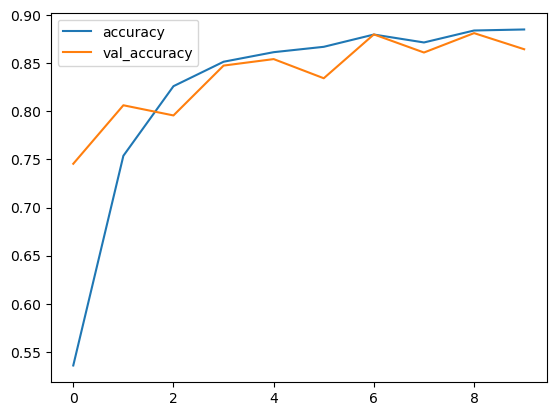

313/313 [==============================] - 4s 12ms/step - loss: 0.3915 - accuracy: 0.8580

Test Confusion Maxtrix: 
313/313 [==============================] - 4s 10ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,688,12,18,72,11,1,196,0,2,0
1,0,986,0,12,2,0,0,0,0,0
2,8,2,591,23,286,0,90,0,0,0
3,6,7,3,900,61,0,21,0,1,1
4,0,2,10,15,913,0,59,0,1,0
5,0,0,0,1,0,944,0,44,0,11
6,69,6,41,62,121,0,697,0,4,0
7,0,0,0,0,0,6,0,987,0,7
8,0,5,6,2,16,1,11,10,949,0


In [43]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 10
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
class TQDMProgressBar(callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.epochs_pbar = tqdm(total=self.params['epochs'], desc='Training Progress', position=0, leave=True)

    def on_epoch_end(self, epoch, logs=None):
        self.epochs_pbar.update(1)

    def on_train_end(self, logs=None):
        self.epochs_pbar.close()
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','Fashion_MNIST_ResNet50.keras')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', patience=EARLYSTOP_PATIENT, verbose=1), 
            TQDMProgressBar(),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(-1, X_test.shape[1], X_train.shape[2], 1)
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
model = ResNet50(input_tensor=inputs, pooling='max', include_top=True, 
                 weights=None, classes=Y_train.shape[1])
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

목표값: 


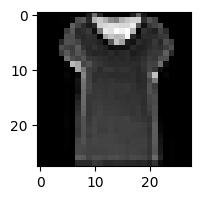

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
예측값:  T-shirt


In [44]:
# 베스트 모델 로딩
model = load_model(FILENAME)

# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
Y_label_list = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
print('예측값: ', Y_label_list[np.argmax(model.predict(X_test[idx_rand][np.newaxis,:]))])

# **Problem:** 컬러사물이미지 분류

## Data Preprocessing

In [45]:
# Train, Test 로딩
mnist = keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 38s 0us/step 


In [46]:
# 데이터의 갯수와 크기 확인
print('---------------train----------------')
print('X: ', X_train.shape, X_train.min(), X_train.max())
print('Y: ', Y_train.shape)
print('----------------test----------------')
print('X: ', X_test.shape, X_test.min(), X_test.max())
print('Y: ', Y_test.shape)

---------------train----------------
X:  (50000, 32, 32, 3) 0 255
Y:  (50000, 1)
----------------test----------------
X:  (10000, 32, 32, 3) 0 255
Y:  (10000, 1)


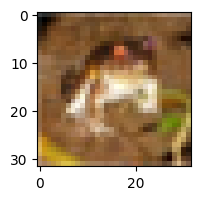

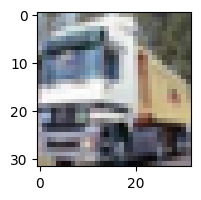

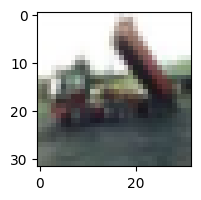

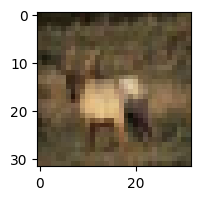

Label of train:  ['Frog', 'Truck', 'Truck', 'Deer']


In [47]:
# 샘플 데이터 시각화
# 0에서 255 사이의 값을 가진 데이터 시각화
for i in range(4):
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[i])
    plt.show()

Y_label_list = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print('Label of train: ', [Y_label_list[num] for num in Y_train.flatten()[:4]])

## MLP

<center><img src='Image/Expert/DL_MLP_Custom.PNG' width='500'></center>

normalized X:  (50000, 32, 32, 3) 0.0 1.0
normalized X:  (10000, 32, 32, 3) 0.0 1.0
X_train: (50000, 3072) Y_train: (50000, 10)
X_test: (10000, 3072) Y_test: (10000, 10)


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2123 - loss: 3.6888 - val_accuracy: 0.3063 - val_loss: 1.9006
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3149 - loss: 1.8708 - val_accuracy: 0.3190 - val_loss: 1.8484
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3273 - loss: 1.8330 - val_accuracy: 0.3103 - val_loss: 1.8682
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3307 - loss: 1.8306 - val_accuracy: 0.3340 - val_loss: 1.8140
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3338 - loss: 1.8064 - val_accuracy: 0.3067 - val_loss: 1.8643
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3339 - loss: 1.8147 - val_accuracy: 0.3324 - val_loss: 1.8176
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3451 - loss: 1.7928 - val_accuracy: 0.3382 - val_loss: 1.7946
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3453 - loss: 1.7851 - val_accuracy: 0.

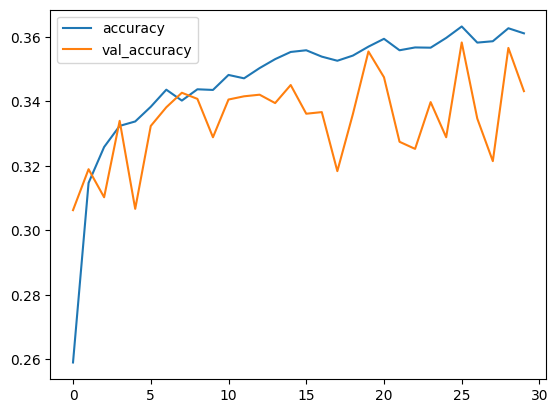

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3626 - loss: 1.7013
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3519 - loss: 1.7417 

Test Confusion Maxtrix: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step    


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,421,78,31,57,136,30,17,31,178,21
1,21,664,1,58,74,24,16,19,86,37
2,107,39,32,81,436,81,166,33,17,8
3,27,86,14,262,191,225,136,28,25,6
4,34,23,12,84,552,50,182,36,21,6
5,21,49,7,164,207,364,122,37,24,5
6,4,53,5,156,310,79,372,15,5,1
7,40,54,9,79,326,97,42,317,15,21
8,145,219,6,30,87,58,7,5,427,16


In [48]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 30
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
class TQDMProgressBar(callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.epochs_pbar = tqdm(total=self.params['epochs'], desc='Training Progress', position=0, leave=True)

    def on_epoch_end(self, epoch, logs=None):
        self.epochs_pbar.update(1)

    def on_train_end(self, logs=None):
        self.epochs_pbar.close()
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','ColorObject_MNIST_MLP.keras')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', patience=EARLYSTOP_PATIENT, verbose=1), 
            TQDMProgressBar(),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

## CNN

<center><img src='Image/Expert/CNN_Example.webp' width='900'></center>

normalized X:  (50000, 32, 32, 3) 0.0 1.0
normalized X:  (10000, 32, 32, 3) 0.0 1.0
X_train: (50000, 32, 32, 3) Y_train: (50000, 10)
X_test: (10000, 32, 32, 3) Y_test: (10000, 10)


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │       131,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,810 (815.66 KB)

 Trainable params: 208,810 (815.66 KB)

 Non-trainable params: 0 (0.00 B)

Training Progress:   0%|                                                                         | 0/30 [00:00<?, ?it/s]

Epoch 1/30
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1921 - loss: 2.2141

Training Progress:   3%|██▏                                                              | 1/30 [00:07<03:44,  7.73s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1927 - loss: 2.2120 - val_accuracy: 0.4019 - val_loss: 1.6686
Epoch 2/30
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3452 - loss: 1.7607

Training Progress:   7%|████▎                                                            | 2/30 [00:11<02:26,  5.25s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3452 - loss: 1.7606 - val_accuracy: 0.3928 - val_loss: 1.6728
Epoch 3/30
619/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3608 - loss: 1.7205

Training Progress:  10%|██████▌                                                          | 3/30 [00:14<02:00,  4.47s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3608 - loss: 1.7205 - val_accuracy: 0.4242 - val_loss: 1.5944
Epoch 4/30
618/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3763 - loss: 1.6889

Training Progress:  13%|████████▋                                                        | 4/30 [00:18<01:47,  4.12s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3763 - loss: 1.6890 - val_accuracy: 0.4066 - val_loss: 1.6596
Epoch 5/30
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3835 - loss: 1.6698

Training Progress:  17%|██████████▊                                                      | 5/30 [00:21<01:38,  3.92s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3834 - loss: 1.6699 - val_accuracy: 0.4270 - val_loss: 1.5785
Epoch 6/30
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3890 - loss: 1.6533

Training Progress:  20%|█████████████                                                    | 6/30 [00:25<01:30,  3.76s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3890 - loss: 1.6533 - val_accuracy: 0.4435 - val_loss: 1.5502
Epoch 7/30
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3940 - loss: 1.6424

Training Progress:  23%|███████████████▏                                                 | 7/30 [00:28<01:25,  3.71s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3940 - loss: 1.6424 - val_accuracy: 0.4723 - val_loss: 1.4822
Epoch 8/30
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4002 - loss: 1.6338

Training Progress:  27%|█████████████████▎                                               | 8/30 [00:32<01:22,  3.75s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4002 - loss: 1.6338 - val_accuracy: 0.4676 - val_loss: 1.4936
Epoch 9/30
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3985 - loss: 1.6293

Training Progress:  30%|███████████████████▌                                             | 9/30 [00:36<01:21,  3.87s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3985 - loss: 1.6293 - val_accuracy: 0.4597 - val_loss: 1.5028
Epoch 10/30
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4062 - loss: 1.6248

Training Progress:  33%|█████████████████████▎                                          | 10/30 [00:41<01:21,  4.08s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4062 - loss: 1.6248 - val_accuracy: 0.4596 - val_loss: 1.5151
Epoch 11/30
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4083 - loss: 1.6115

Training Progress:  37%|███████████████████████▍                                        | 11/30 [00:45<01:17,  4.11s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4083 - loss: 1.6115 - val_accuracy: 0.4614 - val_loss: 1.5135
Epoch 12/30
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4023 - loss: 1.6237

Training Progress:  40%|█████████████████████████▌                                      | 12/30 [00:50<01:16,  4.24s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4023 - loss: 1.6237 - val_accuracy: 0.4649 - val_loss: 1.4886
Epoch 13/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4047 - loss: 1.6091

Training Progress:  43%|███████████████████████████▋                                    | 13/30 [00:54<01:10,  4.17s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4047 - loss: 1.6091 - val_accuracy: 0.4441 - val_loss: 1.5646
Epoch 14/30
616/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4126 - loss: 1.6138

Training Progress:  47%|█████████████████████████████▊                                  | 14/30 [00:58<01:05,  4.07s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4125 - loss: 1.6138 - val_accuracy: 0.4536 - val_loss: 1.5169
Epoch 15/30
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4114 - loss: 1.6173

Training Progress:  50%|████████████████████████████████                                | 15/30 [01:01<00:59,  3.95s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4114 - loss: 1.6173 - val_accuracy: 0.4712 - val_loss: 1.4669
Epoch 16/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4180 - loss: 1.5953

Training Progress:  53%|██████████████████████████████████▏                             | 16/30 [01:06<00:57,  4.11s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4180 - loss: 1.5953 - val_accuracy: 0.4495 - val_loss: 1.5348
Epoch 17/30
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4175 - loss: 1.5969

Training Progress:  57%|████████████████████████████████████▎                           | 17/30 [01:09<00:51,  3.97s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4175 - loss: 1.5969 - val_accuracy: 0.4879 - val_loss: 1.4409
Epoch 18/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4154 - loss: 1.6071

Training Progress:  60%|██████████████████████████████████████▍                         | 18/30 [01:14<00:48,  4.04s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4154 - loss: 1.6071 - val_accuracy: 0.4667 - val_loss: 1.4941
Epoch 19/30
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4144 - loss: 1.6087

Training Progress:  63%|████████████████████████████████████████▌                       | 19/30 [01:18<00:47,  4.28s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4144 - loss: 1.6086 - val_accuracy: 0.4590 - val_loss: 1.5061
Epoch 20/30
619/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4180 - loss: 1.5786

Training Progress:  67%|██████████████████████████████████████████▋                     | 20/30 [01:22<00:41,  4.10s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4180 - loss: 1.5787 - val_accuracy: 0.4802 - val_loss: 1.4507
Epoch 21/30
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4172 - loss: 1.5939

Training Progress:  70%|████████████████████████████████████████████▊                   | 21/30 [01:26<00:35,  3.95s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4172 - loss: 1.5939 - val_accuracy: 0.4790 - val_loss: 1.4620
Epoch 22/30
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4178 - loss: 1.5821

Training Progress:  73%|██████████████████████████████████████████████▉                 | 22/30 [01:29<00:30,  3.83s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4178 - loss: 1.5822 - val_accuracy: 0.4895 - val_loss: 1.4231
Epoch 23/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4167 - loss: 1.5882

Training Progress:  77%|█████████████████████████████████████████████████               | 23/30 [01:33<00:26,  3.77s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4167 - loss: 1.5882 - val_accuracy: 0.4820 - val_loss: 1.4538
Epoch 24/30
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4229 - loss: 1.5742

Training Progress:  80%|███████████████████████████████████████████████████▏            | 24/30 [01:37<00:22,  3.73s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4229 - loss: 1.5743 - val_accuracy: 0.4863 - val_loss: 1.4433
Epoch 25/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4174 - loss: 1.5960

Training Progress:  83%|█████████████████████████████████████████████████████▎          | 25/30 [01:40<00:18,  3.70s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4174 - loss: 1.5960 - val_accuracy: 0.4833 - val_loss: 1.4343
Epoch 26/30
617/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4225 - loss: 1.5737

Training Progress:  87%|███████████████████████████████████████████████████████▍        | 26/30 [01:44<00:14,  3.64s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4224 - loss: 1.5738 - val_accuracy: 0.4723 - val_loss: 1.4801
Epoch 27/30
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4209 - loss: 1.5749

Training Progress:  90%|█████████████████████████████████████████████████████████▌      | 27/30 [01:47<00:10,  3.63s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4209 - loss: 1.5750 - val_accuracy: 0.4733 - val_loss: 1.4683
Epoch 28/30
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4246 - loss: 1.5741

Training Progress:  93%|███████████████████████████████████████████████████████████▋    | 28/30 [01:51<00:07,  3.60s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4246 - loss: 1.5742 - val_accuracy: 0.4621 - val_loss: 1.4658
Epoch 29/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4194 - loss: 1.5867

Training Progress:  97%|█████████████████████████████████████████████████████████████▊  | 29/30 [01:54<00:03,  3.60s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4194 - loss: 1.5866 - val_accuracy: 0.4855 - val_loss: 1.4437
Epoch 30/30
619/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4257 - loss: 1.5670

Training Progress: 100%|████████████████████████████████████████████████████████████████| 30/30 [01:58<00:00,  3.59s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4257 - loss: 1.5671 - val_accuracy: 0.4493 - val_loss: 1.5151


Training Progress: 100%|████████████████████████████████████████████████████████████████| 30/30 [01:58<00:00,  3.95s/it]


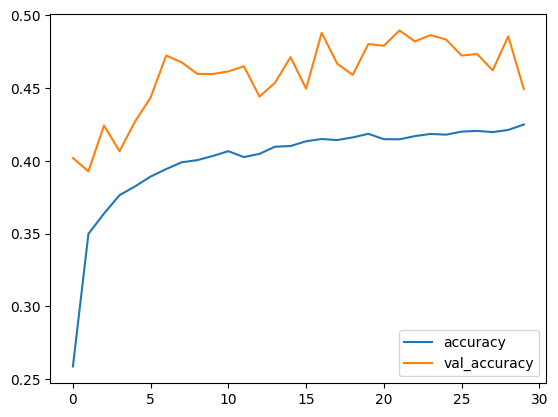

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4671 - loss: 1.4809
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4569 - loss: 1.5071

Test Confusion Maxtrix: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step    


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,480,31,71,34,143,7,32,28,120,54
1,67,526,4,39,16,4,56,6,29,253
2,57,6,152,72,501,38,103,40,21,10
3,16,15,31,253,341,75,183,40,17,29
4,18,3,28,36,710,17,105,73,7,3
5,8,6,55,193,341,170,116,86,11,14
6,3,8,11,34,256,4,646,21,9,8
7,17,8,13,69,239,43,47,552,2,10
8,255,66,29,42,63,3,29,11,454,48


In [49]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 30
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
class TQDMProgressBar(callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.epochs_pbar = tqdm(total=self.params['epochs'], desc='Training Progress', position=0, leave=True)

    def on_epoch_end(self, epoch, logs=None):
        self.epochs_pbar.update(1)

    def on_train_end(self, logs=None):
        self.epochs_pbar.close()
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','ColorObject_MNIST_CNN.keras')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', patience=EARLYSTOP_PATIENT, verbose=1), 
            TQDMProgressBar(),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
hiddens = Conv2D(128, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(inputs)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Conv2D(64, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(hiddens)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Flatten()(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION)(hiddens)  
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

목표값: 


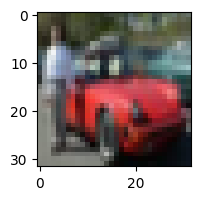

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
예측값:  Automobile


In [50]:
# 베스트 모델 로딩
model = load_model(FILENAME)

# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
Y_label_list = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print('예측값: ', Y_label_list[np.argmax(model.predict(X_test[idx_rand][np.newaxis,:]))])

## ResNet50

<center><img src='Image/Expert/CNN_ResNet.png' width='1000'>(Deep Residual Learning for Image Recognition)</center>

I0000 00:00:1744020550.523355   12485 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5520 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


normalized X:  (50000, 32, 32, 3) 0.0 1.0
normalized X:  (10000, 32, 32, 3) 0.0 1.0
X_train: (50000, 32, 32, 3) Y_train: (50000, 10)
X_test: (10000, 32, 32, 3) Y_test: (10000, 10)


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 23,555,082 (89.86 MB)

 Non-trainable params: 53,120 (207.50 KB)

Training Progress:   0%|                                                                         | 0/30 [00:00<?, ?it/s]

Epoch 1/30


I0000 00:00:1744020576.569551   12684 service.cc:148] XLA service 0x7f0ba40ac110 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744020576.569613   12684 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2025-04-07 19:09:37.101152: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744020579.601585   12684 cuda_dnn.cc:529] Loaded cuDNN version 90600
2025-04-07 19:09:40.995903: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14140', 4 bytes spill stores, 4 bytes spill loads

2025-04-07 19:09:41.181263: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_9672'

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1265 - loss: 4.2632 

2025-04-07 19:10:10.855009: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1708', 92 bytes spill stores, 92 bytes spill loads

Training Progress:   3%|██▏                                                              | 1/30 [00:56<27:25, 56.72s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 36ms/step - accuracy: 0.1265 - loss: 4.2612 - val_accuracy: 0.1316 - val_loss: 2.7745
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2648 - loss: 1.9692 

Training Progress:   7%|████▎                                                            | 2/30 [01:13<15:33, 33.34s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.2649 - loss: 1.9690 - val_accuracy: 0.3355 - val_loss: 1.8742
Epoch 3/30
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3819 - loss: 1.6601 

Training Progress:  10%|██████▌                                                          | 3/30 [01:31<11:45, 26.12s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.3819 - loss: 1.6600 - val_accuracy: 0.4160 - val_loss: 1.6424
Epoch 4/30
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4499 - loss: 1.5023 

Training Progress:  13%|████████▋                                                        | 4/30 [01:49<10:02, 23.16s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.4500 - loss: 1.5022 - val_accuracy: 0.3823 - val_loss: 1.8724
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5016 - loss: 1.3734 

Training Progress:  17%|██████████▊                                                      | 5/30 [02:04<08:25, 20.21s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.5016 - loss: 1.3734 - val_accuracy: 0.4373 - val_loss: 1.6894
Epoch 6/30
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5361 - loss: 1.2784 

Training Progress:  20%|█████████████                                                    | 6/30 [02:19<07:22, 18.45s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.5361 - loss: 1.2784 - val_accuracy: 0.0955 - val_loss: 1221.6270
Epoch 7/30
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4927 - loss: 1.4083 

Training Progress:  23%|███████████████▏                                                 | 7/30 [02:35<06:39, 17.38s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.4928 - loss: 1.4081 - val_accuracy: 0.5046 - val_loss: 1.7055
Epoch 8/30
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5634 - loss: 1.2254 

Training Progress:  27%|█████████████████▎                                               | 8/30 [02:50<06:05, 16.62s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.5635 - loss: 1.2253 - val_accuracy: 0.5568 - val_loss: 1.3146
Epoch 9/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6161 - loss: 1.0854 

Training Progress:  30%|███████████████████▌                                             | 9/30 [03:08<05:59, 17.11s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.6161 - loss: 1.0854 - val_accuracy: 0.5550 - val_loss: 1.3151
Epoch 10/30
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6580 - loss: 0.9824 

Training Progress:  33%|█████████████████████▎                                          | 10/30 [03:23<05:28, 16.42s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.6580 - loss: 0.9823 - val_accuracy: 0.5916 - val_loss: 1.2147
Epoch 11/30
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6887 - loss: 0.8939 

Training Progress:  37%|███████████████████████▍                                        | 11/30 [03:41<05:21, 16.91s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.6887 - loss: 0.8939 - val_accuracy: 0.4981 - val_loss: 1.7349
Epoch 12/30
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7072 - loss: 0.8522 

Training Progress:  40%|█████████████████████████▌                                      | 12/30 [03:55<04:51, 16.20s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7072 - loss: 0.8522 - val_accuracy: 0.5089 - val_loss: 1.7611
Epoch 13/30
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7280 - loss: 0.7836 

Training Progress:  43%|███████████████████████████▋                                    | 13/30 [04:10<04:29, 15.83s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7280 - loss: 0.7836 - val_accuracy: 0.5504 - val_loss: 1.4352
Epoch 14/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7582 - loss: 0.7026 

Training Progress:  47%|█████████████████████████████▊                                  | 14/30 [04:25<04:07, 15.49s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7582 - loss: 0.7026 - val_accuracy: 0.5240 - val_loss: 1.7314
Epoch 15/30
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7865 - loss: 0.6257 

Training Progress:  50%|████████████████████████████████                                | 15/30 [04:40<03:49, 15.32s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7865 - loss: 0.6257 - val_accuracy: 0.5883 - val_loss: 1.4312
Epoch 16/30
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8078 - loss: 0.5581 

Training Progress:  53%|██████████████████████████████████▏                             | 16/30 [04:54<03:31, 15.12s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8077 - loss: 0.5581 - val_accuracy: 0.6136 - val_loss: 1.5011
Epoch 17/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7886 - loss: 0.6231 

Training Progress:  57%|████████████████████████████████████▎                           | 17/30 [05:09<03:14, 15.00s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7886 - loss: 0.6230 - val_accuracy: 0.6018 - val_loss: 1.5768
Epoch 18/30
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8470 - loss: 0.4398 

Training Progress:  60%|██████████████████████████████████████▍                         | 18/30 [05:24<02:58, 14.85s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8470 - loss: 0.4398 - val_accuracy: 0.6554 - val_loss: 1.2813
Epoch 19/30
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8544 - loss: 0.4200 

Training Progress:  63%|████████████████████████████████████████▌                       | 19/30 [05:38<02:42, 14.80s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8544 - loss: 0.4200 - val_accuracy: 0.6346 - val_loss: 1.5247
Epoch 20/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8772 - loss: 0.3568 

Training Progress:  67%|██████████████████████████████████████████▋                     | 20/30 [05:53<02:27, 14.78s/it]

625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.8772 - loss: 0.3567 - val_accuracy: 0.6120 - val_loss: 1.7407
Epoch 20: early stopping


Training Progress:  67%|██████████████████████████████████████████▋                     | 20/30 [05:53<02:56, 17.68s/it]


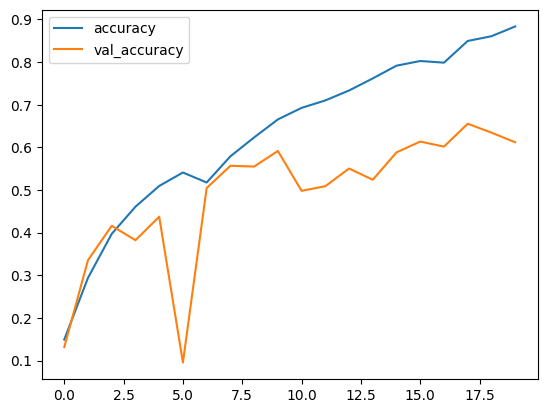

2025-04-07 19:15:11.034417: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1708', 92 bytes spill stores, 92 bytes spill loads

2025-04-07 19:15:11.077406: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1708', 384 bytes spill stores, 384 bytes spill loads



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7178 - loss: 1.0968
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6084 - loss: 1.8396

Test Confusion Maxtrix: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,765,49,52,7,8,1,37,0,46,35
1,11,910,5,5,1,1,26,0,16,25
2,97,23,576,41,27,32,163,11,20,10
3,50,61,92,302,50,117,265,7,33,23
4,51,21,120,37,416,32,289,11,12,11
5,35,27,108,126,40,418,176,20,37,13
6,10,13,27,15,8,6,908,0,10,3
7,88,37,90,46,92,68,95,401,4,79
8,126,61,21,4,6,2,24,1,744,11


In [51]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 30
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
class TQDMProgressBar(callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.epochs_pbar = tqdm(total=self.params['epochs'], desc='Training Progress', position=0, leave=True)

    def on_epoch_end(self, epoch, logs=None):
        self.epochs_pbar.update(1)

    def on_train_end(self, logs=None):
        self.epochs_pbar.close()
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','ColorObject_MNIST_ResNet50.keras')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', patience=EARLYSTOP_PATIENT, verbose=1), 
            TQDMProgressBar(),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
model = ResNet50(input_tensor=inputs, pooling='max', include_top=True, 
                 weights=None, classes=Y_train.shape[1])
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

목표값: 


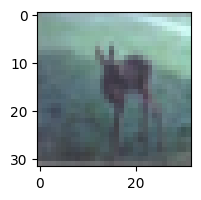

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
예측값:  Bird


In [52]:
# 베스트 모델 로딩
model = load_model(FILENAME)

# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
Y_label_list = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print('예측값: ', Y_label_list[np.argmax(model.predict(X_test[idx_rand][np.newaxis,:]))])

# **Problem:** 보스턴 집값 예측

|   **변수**  |              **설명**              |
|:-------:|:------------------------------:|
|  **Price**  |            주택 가격           |
|   **CRIM**  |        1인당 범죄 발생률       |
|    **ZN**   |       주택용 토지의 비율       |
|  **INDUS**  |      비소매 상업지역 비율      |
|   **CHAS**  |    찰스강 인접 여부(인접=1)    |
|   **NOX**   |         일산화질소 농도        |
|    **RM**   |            방의 개수           |
|   **AGE**   | 1940년 이전에 건축된 주택 비율 |
|   **DIS**   |     주요 5대 회사와의 거리     |
|   **RAD**   |         고속도로 접근성        |
|   **TAX**   |             재산세             |
| **PTRATIO** |       교사와 학생의 비율       |
|    **B**    |         흑인 거주 비율         |
|  **LSTAT**  |          저소득층 비율         |

## MLP

<center><img src='Image/Expert/DL_MLP_Custom.PNG' width='500'></center>

(404, 13) (404, 1)
(102, 13) (102, 1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,129 (188.00 KB)

 Trainable params: 48,129 (188.00 KB)

 Non-trainable params: 0 (0.00 B)

I0000 00:00:1744020460.810356    1942 service.cc:148] XLA service 0x7f6e6001e780 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744020460.810654    1942 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2025-04-07 19:07:40.853567: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744020461.018371    1942 cuda_dnn.cc:529] Loaded cuDNN version 90600
I0000 00:00:1744020462.371777    1942 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
Training Progress:   5%|███▎                                                           | 26/500 [00:10<00:53,  8.91it/s]

Epoch 26: early stopping


Training Progress:   5%|███▎                                                           | 26/500 [00:10<03:18,  2.39it/s]


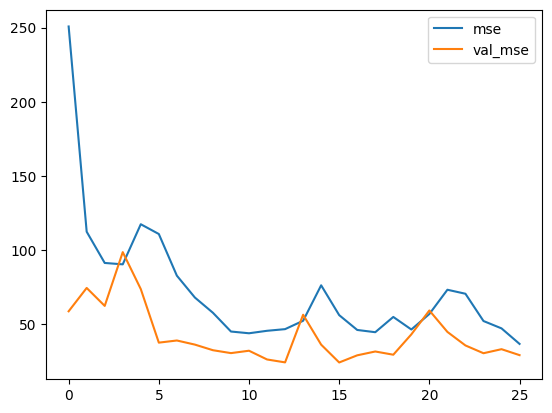

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step


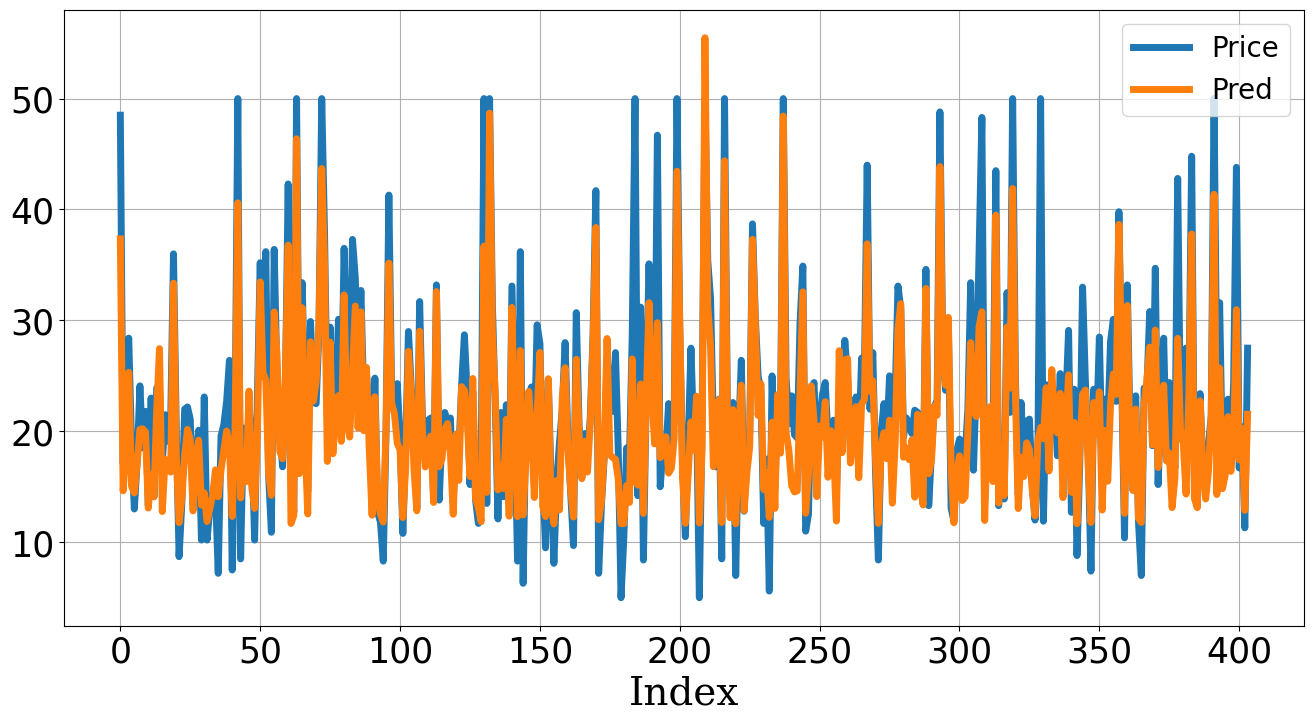

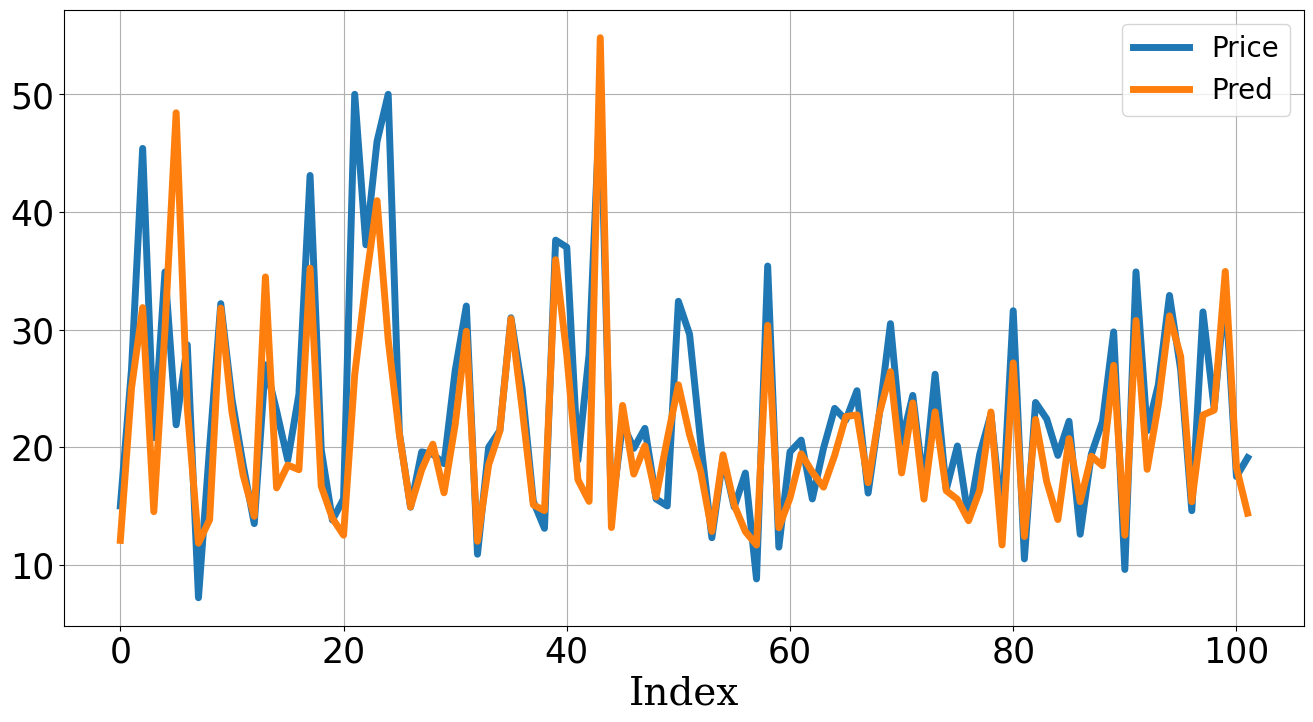

,MAE,MSE,MAPE
Train,2.99,20.24,0.15
Test,3.51,31.82,0.15


In [55]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'linear'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'mse'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['mse']
BATCH_SIZE = 32
EPOCHS = 500
VERBOSE = 0
################
EARLYSTOP_PATIENT = 10
class TQDMProgressBar(callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.epochs_pbar = tqdm(total=self.params['epochs'], desc='Training Progress', position=0, leave=True)

    def on_epoch_end(self, epoch, logs=None):
        self.epochs_pbar.update(1)

    def on_train_end(self, logs=None):
        self.epochs_pbar.close()
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','BostonHousing_MLP.keras')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', patience=EARLYSTOP_PATIENT, verbose=1), 
            TQDMProgressBar(),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(inputs)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


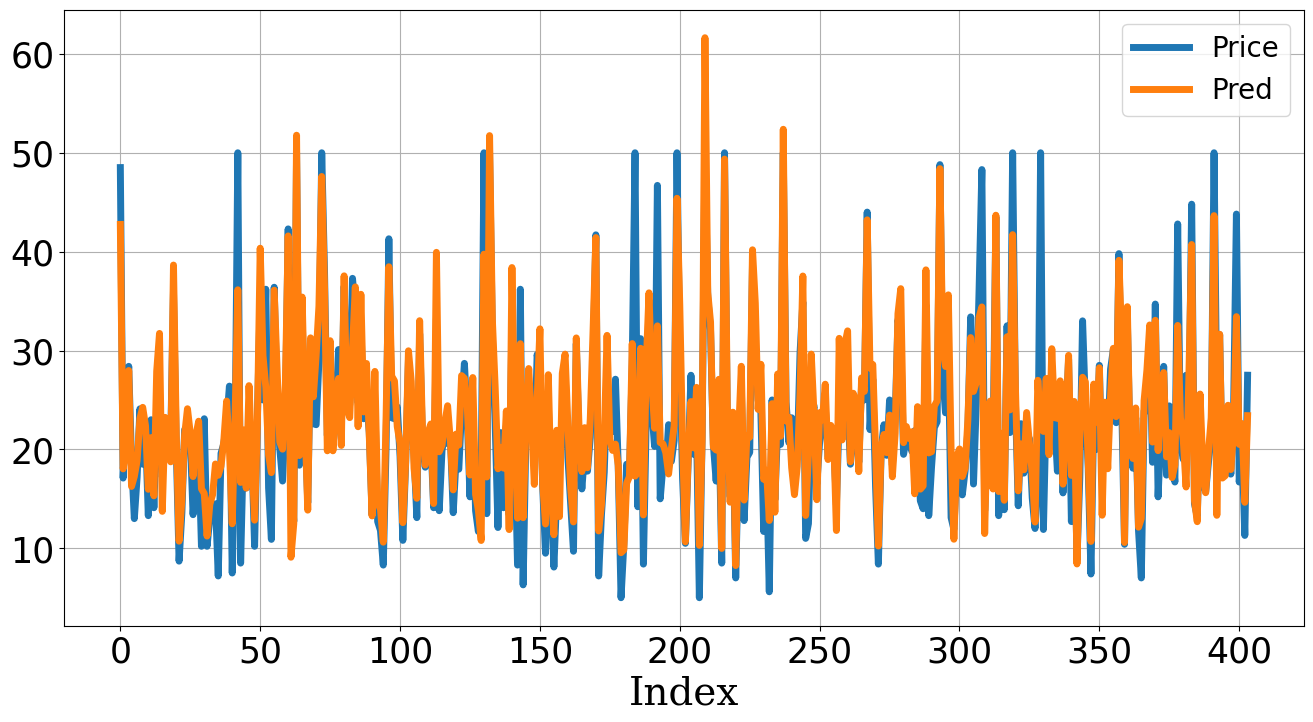

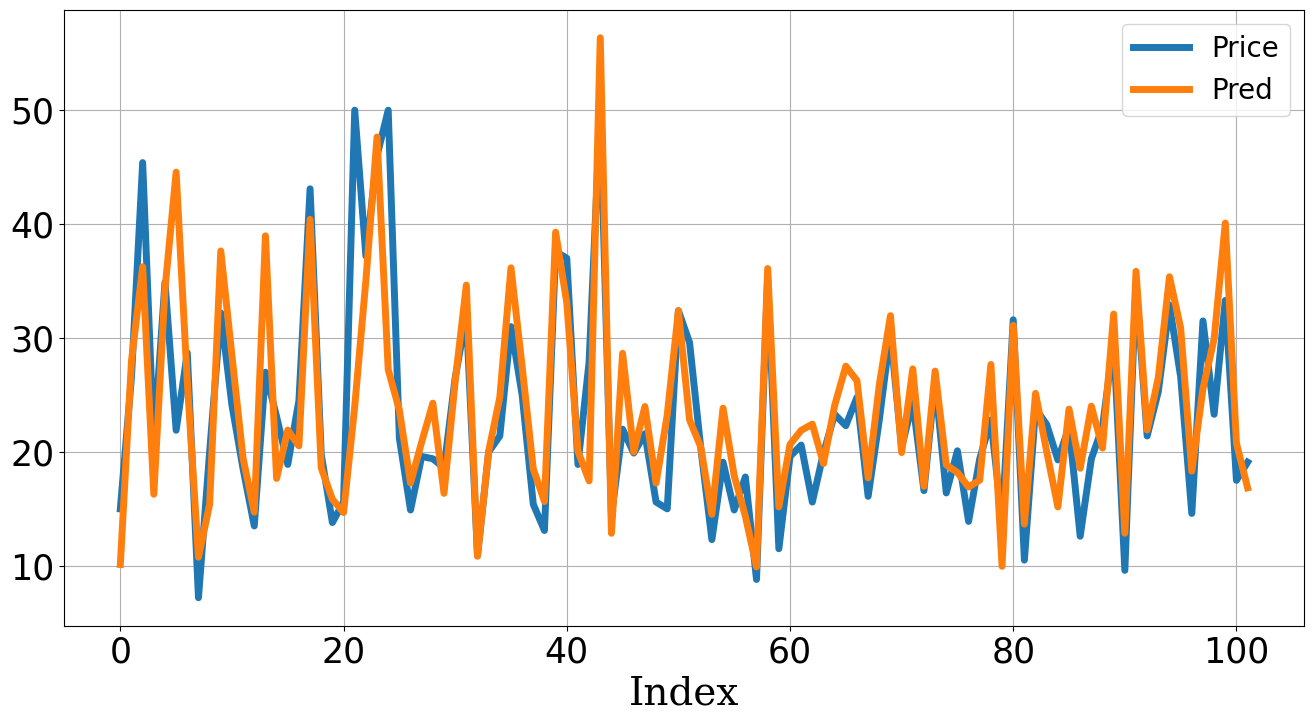

,MAE,MSE,MAPE
Train,2.90,18.24,0.15
Test,3.61,30.59,0.16


In [56]:
# 베스트 모델 로딩
model = load_model(FILENAME)

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

## CNN

<center><img src='Image/Expert/CNN_Example.webp' width='900'></center>

---

<center><img src='Image/Expert/Conv1D2D3D.png' width='800'>(https://i.stack.imgur.com/)</center>

---

- **Reshape**

<center><img src='Image/Expert/CNN_Reshape2D.PNG' width='1000'></center>

(404, 13) (404, 1)
(102, 13) (102, 1)
X_train: (404, 18, 1) Y_train: (404, 1)
X_test: (102, 18, 1) Y_test: (102, 1)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 18, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 18, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 9, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 9, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 9, 64)          │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,409 (130.50 KB)

 Trainable params: 33,409 (130.50 KB)

 Non-trainable params: 0 (0.00 B)

Training Progress:  16%|██████████                                                     | 80/500 [00:16<01:01,  6.84it/s]

Epoch 80: early stopping


Training Progress:  16%|██████████                                                     | 80/500 [00:16<01:28,  4.73it/s]


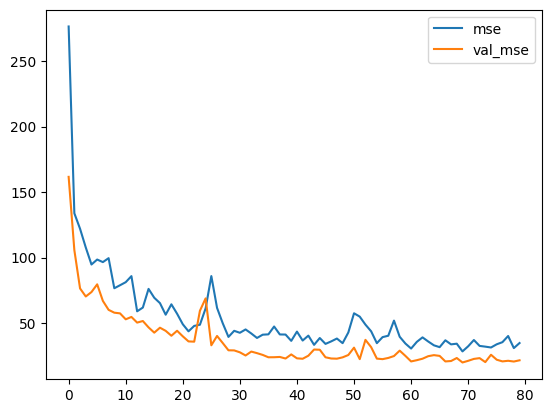

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


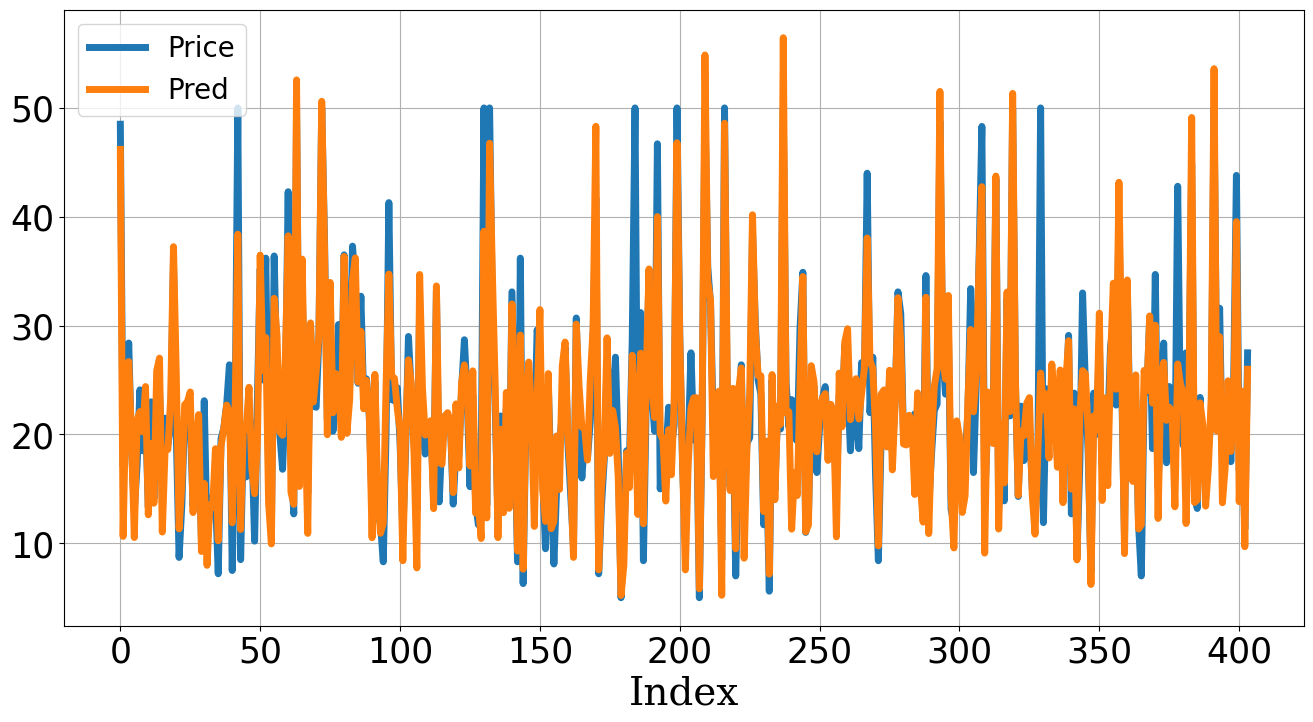

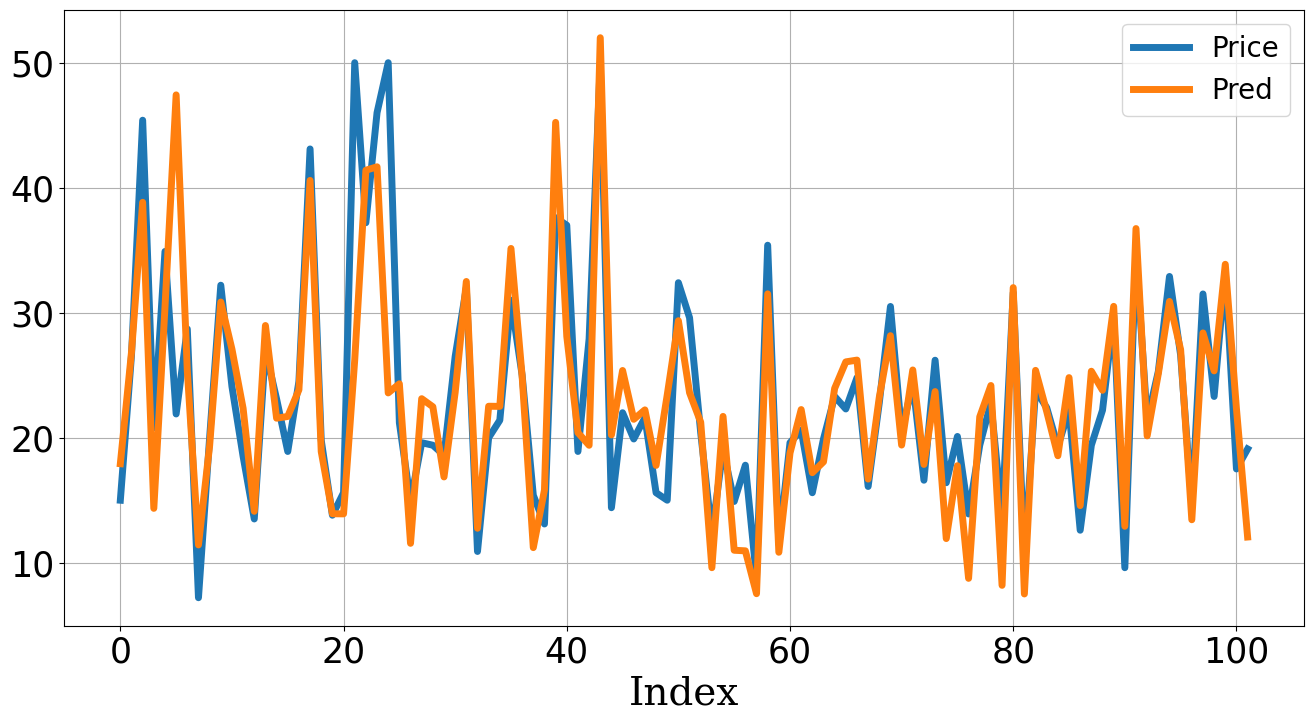

,MAE,MSE,MAPE
Train,2.48,13.29,0.12
Test,3.33,29.73,0.15


In [57]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = 3
STRIDE = 1
POOL_SIZE = 2
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'linear'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'mse'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['mse']
BATCH_SIZE = 32
EPOCHS = 500
VERBOSE = 0
################
EARLYSTOP_PATIENT = 10
class TQDMProgressBar(callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.epochs_pbar = tqdm(total=self.params['epochs'], desc='Training Progress', position=0, leave=True)

    def on_epoch_end(self, epoch, logs=None):
        self.epochs_pbar.update(1)

    def on_train_end(self, logs=None):
        self.epochs_pbar.close()
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','BostonHousing_CNN.keras')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', patience=EARLYSTOP_PATIENT, verbose=1), 
            TQDMProgressBar(),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Reshape
X_train = X_train_fes.values.reshape(-1, X_train_fes.shape[1], 1)
X_test = X_test_fes.values.reshape(-1, X_test_fes.shape[1], 1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))   
hiddens = Conv1D(128, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(inputs)
hiddens = MaxPooling1D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Conv1D(64, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(hiddens)
hiddens = MaxPooling1D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Flatten()(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION)(hiddens)  
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


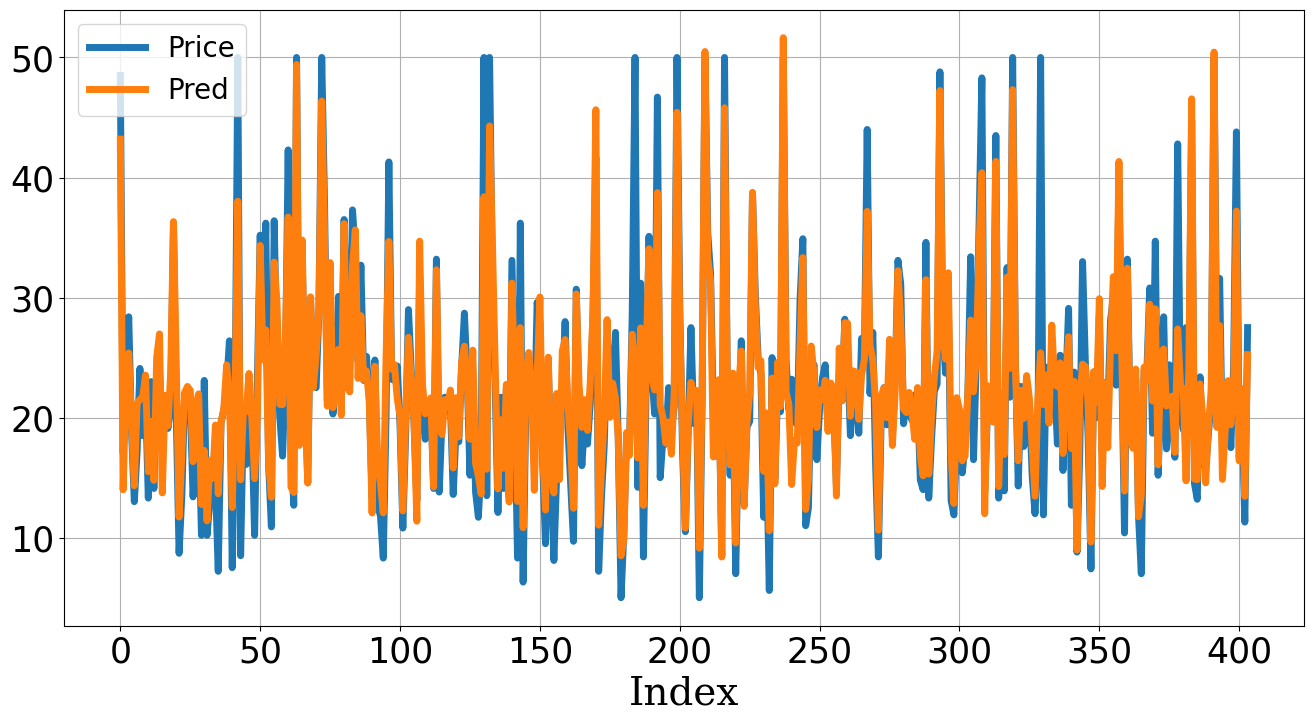

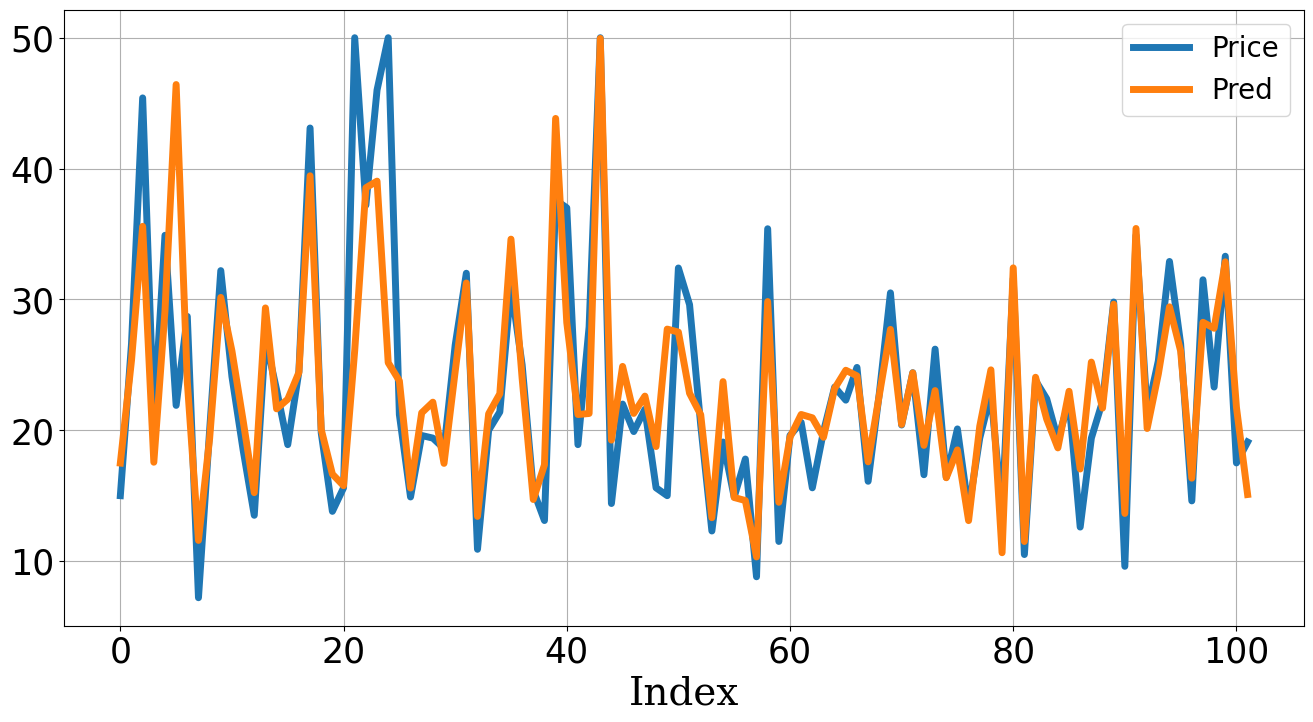

,MAE,MSE,MAPE
Train,2.37,12.54,0.13
Test,3.11,28.51,0.14


In [58]:
# 베스트 모델 로딩
model = load_model(FILENAME)

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)